# IBM Data Science Certificate Capstone Final Project

#### Junhong Li

### Back ground & Business Problem
#### Visit Boston to promote the recovery of the Boston area's tourism industry after the COVID-19 Pandemic. They hope to make new travel guides to help tourists. As it happens, Boston Common is located in the heart of Boston, along with Massachusetts State House, Public Garden, and Four Seasons Hotel, making it one of the most popular tourist attractions. While going out, enjoying a good meal while enjoying the beautiful scenery can deepen tourists' impression of a city. It may even increase the love of the city and help promote it. However, there are many kinds of restaurants around Boston Common. How to recommend suitable potential high-quality restaurants to tourists based on geographical location and restaurant types has become a problem that needs to be solved.

### Data
#### Through Foursquare API to obtain the map location data of the Four Seasons Hotel near Boston Common. Then filter and clear the data record, get the dataset about the restaurant.

#### Data content: 
#### restaruant name
#### id
#### categories
#### latitude
#### longitude
#### total likes

In [1]:
# Import 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [2]:
CLIENT_ID = 'MFSXD3O3SHRPQEOF23IVZ4REAJLNLAZO3EFRIJT4HE3YKZ5C' # your Foursquare ID
CLIENT_SECRET = '1SXUZP5NIGOWLBH4KHNPHMY4DSPSWEZPOQSAJ0WHANG02UER' # your Foursquare Secret
VERSION = '20210722'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MFSXD3O3SHRPQEOF23IVZ4REAJLNLAZO3EFRIJT4HE3YKZ5C
CLIENT_SECRET:1SXUZP5NIGOWLBH4KHNPHMY4DSPSWEZPOQSAJ0WHANG02UER


In [3]:
# Four Seasons Hotel Boston

address = '200 Boylston St, Boston, MA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Four Seasons Hotel Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Four Seasons Hotel Boston are 42.352542, -71.0677682.


In [4]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MFSXD3O3SHRPQEOF23IVZ4REAJLNLAZO3EFRIJT4HE3YKZ5C&client_secret=1SXUZP5NIGOWLBH4KHNPHMY4DSPSWEZPOQSAJ0WHANG02UER&v=20210722&ll=42.352542,-71.0677682&radius=500&limit=100'

In [5]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60f912eec21d6f3435979590'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Beacon Hill',
  'headerFullLocation': 'Beacon Hill, Boston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 92,
  'suggestedBounds': {'ne': {'lat': 42.3570420045, 'lng': -71.0616903654229},
   'sw': {'lat': 42.3480419955, 'lng': -71.0738460345771}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aaa3040f964a5209d5520e3',
       'name': 'Four Seasons Hotel Boston',
       'location': {'address': '200 Boylston St',
        'crossStreet': 'at Charles Street',
        'lat': 42.35246777391014,
        'lng': -71.068

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
#get the data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues

<ipython-input-7-7d3ed935dd12>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Four Seasons Hotel Boston,4aaa3040f964a5209d5520e3,Hotel,42.352468,-71.068752
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976
3,Boston Public Garden,44cf0ff8f964a5201c361fe3,Garden,42.354096,-71.069865
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695
5,The Bristol Lounge,3fd66200f964a52060ec1ee3,Lounge,42.352500,-71.068244
6,The Swan Boats,4bb75ca2ef159c74631277f7,Boat or Ferry,42.353961,-71.069586
7,Commonwealth Park,4dff870752b1d747f679f834,Park,42.352752,-71.070626
8,Cutler Majestic Theatre,4ace7819f964a520bfd020e3,Theater,42.351545,-71.064850
9,Exhale,4ae0cff5f964a520c38221e3,Spa,42.351417,-71.070349


In [8]:
#fix the column names
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

,name,id,categories,lat,lng
0,Four Seasons Hotel Boston,4aaa3040f964a5209d5520e3,Hotel,42.352468,-71.068752
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976
3,Boston Public Garden,44cf0ff8f964a5201c361fe3,Garden,42.354096,-71.069865
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695
5,The Bristol Lounge,3fd66200f964a52060ec1ee3,Lounge,42.352500,-71.068244
6,The Swan Boats,4bb75ca2ef159c74631277f7,Boat or Ferry,42.353961,-71.069586
7,Commonwealth Park,4dff870752b1d747f679f834,Park,42.352752,-71.070626
8,Cutler Majestic Theatre,4ace7819f964a520bfd020e3,Theater,42.351545,-71.064850
9,Exhale,4ae0cff5f964a520c38221e3,Spa,42.351417,-71.070349


In [9]:
# get the list of unique categories
nearby_venues['categories'].unique()

array(['Hotel', 'French Restaurant', 'Seafood Restaurant', 'Garden',
       'Italian Restaurant', 'Lounge', 'Boat or Ferry', 'Park', 'Theater',
       'Spa', 'Scenic Lookout', 'Rental Car Location', 'Boutique',
       'Sandwich Place', 'Bakery', 'Performing Arts Venue',
       'Outdoor Sculpture', 'Arts & Crafts Store', 'Gourmet Shop',
       'Pizza Place', 'Smoke Shop', 'Event Space', 'Wine Shop',
       'Burrito Place', 'Pilates Studio', 'Gym / Fitness Center',
       'Hostel', 'Movie Theater', 'Jewelry Store', 'Gym', 'Hotel Bar',
       'Lake', 'Breakfast Spot', 'Opera House', 'Sushi Restaurant',
       'Coffee Shop', 'Steakhouse', 'Hotpot Restaurant', 'Clothing Store',
       'Dive Bar', 'Tourist Information Center', 'Furniture / Home Store',
       'Noodle House', 'Bar', 'Nightclub', 'Playground',
       'American Restaurant', 'Vegetarian / Vegan Restaurant',
       'Chinese Restaurant', 'Other Great Outdoors', 'Restaurant',
       'Speakeasy', 'Donut Shop', 'Café', 'Historic Site

In [10]:
# drop non-restaurant 
removal_list = ['Hotel', 'Garden',
        'Lounge', 'Boat or Ferry', 'Park', 'Theater',
       'Spa', 'Scenic Lookout', 'Rental Car Location',  'Performing Arts Venue',
       'Outdoor Sculpture', 'Arts & Crafts Store', 
        'Smoke Shop', 'Event Space', 'Wine Shop',
        'Pilates Studio', 'Gym / Fitness Center',
       'Hostel', 'Movie Theater', 'Jewelry Store', 'Gym',
       'Lake',  'Opera House',  'Clothing Store', 'Tourist Information Center',
        'Furniture / Home Store', 'Nightclub', 'Playground', 'Other Great Outdoors',
       'Speakeasy', 'Historic Site']

In [11]:
#getting a new dataframe only restaurants
nearby_venues2 = nearby_venues.copy()
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695
14,Hermes,4ba42a98f964a520538838e3,Boutique,42.351849,-71.070525
15,Parish Cafe & Bar,3fd66200f964a52045ec1ee3,Sandwich Place,42.351746,-71.071525
17,Tatte Bakery & Cafe,5a609e9c26659b64aa76af3c,Bakery,42.351667,-71.071715
19,Shaking Crab,5a6d088e0a464d531abfaaa3,Seafood Restaurant,42.352291,-71.066204
21,Teatro,4a4b7a0df964a52067ac1fe3,Italian Restaurant,42.353026,-71.064371
23,Earl of Sandwich,4e04f68ab3ad8ad6f536c543,Sandwich Place,42.354304,-71.066424
24,Bacco's Fine Foods,51ae7268498ece55c2dbb9e6,Gourmet Shop,42.350750,-71.071220


In [12]:
# check shape
nearby_venues2.shape

(42, 5)

In [13]:
#get a list of venues
venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['4b3cc11af964a520da8625e3',
 '5293ef69498e009610e3fdf1',
 '40b28c80f964a5200ff81ee3',
 '4ba42a98f964a520538838e3',
 '3fd66200f964a52045ec1ee3',
 '5a609e9c26659b64aa76af3c',
 '5a6d088e0a464d531abfaaa3',
 '4a4b7a0df964a52067ac1fe3',
 '4e04f68ab3ad8ad6f536c543',
 '51ae7268498ece55c2dbb9e6',
 '585ab814e309e16a0cdaab14',
 '4b1ef391f964a520f82124e3',
 '4b50fd60f964a520343c27e3',
 '4a3cf8bcf964a520b6a11fe3',
 '4b8ec17bf964a520383533e3',
 '519abb90498ecd79e9066cd9',
 '53734d5e498ef0e9f93925f3',
 '59867be32a7ab676698036b8',
 '55e0c3d7498ec10bc1501534',
 '49e1f0c4f964a520e9611fe3',
 '4c91546ab641236ab6a68079',
 '3fd66200f964a520eaeb1ee3',
 '46207467f964a52084451fe3',
 '4a4916f5f964a520f5aa1fe3',
 '4bb2c3fd715eef3b9db585bb',
 '4a91e4f7f964a520421c20e3',
 '41478600f964a520bd1c1fe3',
 '4aee268ff964a52086d221e3',
 '40b28c80f964a5200bf81ee3',
 '5b60cae5b9ac38002cd42c3c',
 '4c2a2790ce3fc928e9da6f88',
 '4ab90e73f964a520dd7d20e3',
 '4c7c06403badb1f7ea9f5654',
 '531e28ea11d2cfce53f540f9',
 '49bd4ba4f964

In [14]:
#get the likes based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[154, 130, 243, 22, 185, 137, 8, 90, 31, 19, 29, 122, 67, 127, 32, 85, 360, 8, 344, 38, 180, 241, 50, 58, 19, 281, 513, 47, 257, 20, 42, 9, 223, 112, 58, 241, 25, 38, 91, 1, 13, 3]


In [15]:
#duplicate check 
print(len(like_list))
print(len(venue_id_list))

42
42


In [16]:
#initial dataframe copy
hoboken_venues = nearby_venues2.copy()
hoboken_venues.head()

,name,id,categories,lat,lng
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695
14,Hermes,4ba42a98f964a520538838e3,Boutique,42.351849,-71.070525
15,Parish Cafe & Bar,3fd66200f964a52045ec1ee3,Sandwich Place,42.351746,-71.071525


In [17]:
# add total likes
hoboken_venues['total likes'] = like_list
hoboken_venues.head()

,name,id,categories,lat,lng,total likes
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634,154
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976,130
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695,243
14,Hermes,4ba42a98f964a520538838e3,Boutique,42.351849,-71.070525,22
15,Parish Cafe & Bar,3fd66200f964a52045ec1ee3,Sandwich Place,42.351746,-71.071525,185


In [18]:
# bin total likes
print(hoboken_venues['total likes'].max())
print(hoboken_venues['total likes'].min())
print(hoboken_venues['total likes'].median())
print(hoboken_venues['total likes'].mean())

513
1
62.5
113.16666666666667


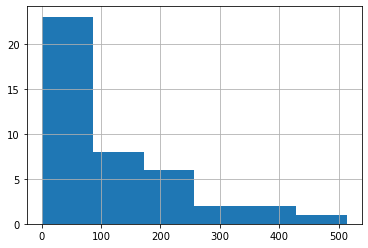

In [19]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
hoboken_venues['total likes'].hist(bins=6)
plt.show()

In [20]:
# get the right judge level
print(np.percentile(hoboken_venues['total likes'], 25))
print(np.percentile(hoboken_venues['total likes'], 50))
print(np.percentile(hoboken_venues['total likes'], 75))

26.0
62.5
173.5


In [21]:
# set appropriate values
# less than 26 poor, 26-62.5 below avg, 62.5-173.5 avg , 173.5> great

poor = hoboken_venues['total likes']<=26
below_avg = hoboken_venues[(hoboken_venues['total likes']>26) & (hoboken_venues['total likes']<=62.5)]
abv_avg = hoboken_venues[(hoboken_venues['total likes']>62.5) & (hoboken_venues['total likes']<=173.5)]
great = hoboken_venues['total likes']>173.5

In [22]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=26:
        return 'poor'
    if s['total likes']<=62.5:
        return 'below avg'
    if s['total likes']<=173.5:
        return 'avg avg'
    if s['total likes']>173.5:
        return 'great'

hoboken_venues['total likes_cat']=hoboken_venues.apply(conditions, axis=1)

In [23]:
# Show df
hoboken_venues

,name,id,categories,lat,lng,total likes,total likes_cat
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634,154,avg avg
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976,130,avg avg
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695,243,great
14,Hermes,4ba42a98f964a520538838e3,Boutique,42.351849,-71.070525,22,poor
15,Parish Cafe & Bar,3fd66200f964a52045ec1ee3,Sandwich Place,42.351746,-71.071525,185,great
17,Tatte Bakery & Cafe,5a609e9c26659b64aa76af3c,Bakery,42.351667,-71.071715,137,avg avg
19,Shaking Crab,5a6d088e0a464d531abfaaa3,Seafood Restaurant,42.352291,-71.066204,8,poor
21,Teatro,4a4b7a0df964a52067ac1fe3,Italian Restaurant,42.353026,-71.064371,90,avg avg
23,Earl of Sandwich,4e04f68ab3ad8ad6f536c543,Sandwich Place,42.354304,-71.066424,31,below avg
24,Bacco's Fine Foods,51ae7268498ece55c2dbb9e6,Gourmet Shop,42.350750,-71.071220,19,poor


In [24]:
# re-categorizing the categories
hoboken_venues['categories'].unique()

array(['French Restaurant', 'Seafood Restaurant', 'Italian Restaurant',
       'Boutique', 'Sandwich Place', 'Bakery', 'Gourmet Shop',
       'Pizza Place', 'Burrito Place', 'Hotel Bar', 'Breakfast Spot',
       'Sushi Restaurant', 'Coffee Shop', 'Steakhouse',
       'Hotpot Restaurant', 'Dive Bar', 'Noodle House', 'Bar',
       'American Restaurant', 'Vegetarian / Vegan Restaurant',
       'Chinese Restaurant', 'Restaurant', 'Donut Shop', 'Café'],
      dtype=object)

In [25]:
# set new catagory
bars = ['Bar', 'Dive Bar','Hotel Bar']
other = ['Sandwich Place', 'Bakery','Boutique', 'Breakfast Spot','Coffee Shop','Donut Shop','Café','Seafood Restaurant','Gourmet Shop']
asian_food = ['Sushi Restaurant', 'Hotpot Restaurant','Noodle House','Vegetarian / Vegan Restaurant','Chinese Restaurant']
mexican_food = ['Burrito Place']
american_food = ['Steakhouse','American Restaurant','Restaurant']
italian_food = ['Italian Restaurant', 'Pizza Place']
french_food = ['French Restaurant']

In [26]:
def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in asian_food:
        return 'asian food'
    if s['categories'] in mexican_food:
        return 'mexican food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'
    if s['categories'] in french_food:
        return 'french food'

In [27]:
hoboken_venues['categories_new']=hoboken_venues.apply(conditions2, axis=1)

In [28]:
hoboken_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634,154,avg avg,french food
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976,130,avg avg,other
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695,243,great,italian food
14,Hermes,4ba42a98f964a520538838e3,Boutique,42.351849,-71.070525,22,poor,other
15,Parish Cafe & Bar,3fd66200f964a52045ec1ee3,Sandwich Place,42.351746,-71.071525,185,great,other
17,Tatte Bakery & Cafe,5a609e9c26659b64aa76af3c,Bakery,42.351667,-71.071715,137,avg avg,other
19,Shaking Crab,5a6d088e0a464d531abfaaa3,Seafood Restaurant,42.352291,-71.066204,8,poor,other
21,Teatro,4a4b7a0df964a52067ac1fe3,Italian Restaurant,42.353026,-71.064371,90,avg avg,italian food
23,Earl of Sandwich,4e04f68ab3ad8ad6f536c543,Sandwich Place,42.354304,-71.066424,31,below avg,other
24,Bacco's Fine Foods,51ae7268498ece55c2dbb9e6,Gourmet Shop,42.350750,-71.071220,19,poor,other


In [29]:
# one hot encoding
hoboken_onehot = pd.get_dummies(hoboken_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column
hoboken_onehot['Name'] = hoboken_venues['name'] 

fixed_columns = [hoboken_onehot.columns[-1]] + list(hoboken_onehot.columns[:-1])
hoboken_onehot = hoboken_onehot[fixed_columns]

hoboken_onehot.head()

,Name,american food,asian food,bars,french food,italian food,mexican food,other,avg avg,below avg,great,poor
1,Bistro du Midi,0,0,0,1,0,0,0,1,0,0,0
2,Ostra,0,0,0,0,0,0,1,1,0,0,0
4,Maggiano's Little Italy,0,0,0,0,1,0,0,0,0,1,0
14,Hermes,0,0,0,0,0,0,1,0,0,0,1
15,Parish Cafe & Bar,0,0,0,0,0,0,1,0,0,1,0


In [30]:
# cluster
cluster_df = hoboken_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 1, 2, 1, 3, 2, 3, 0, 2], dtype=int32)

In [31]:
hoboken_venues['label'] = kmeans.labels_
hoboken_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634,154,avg avg,french food,3
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976,130,avg avg,other,3
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695,243,great,italian food,1
14,Hermes,4ba42a98f964a520538838e3,Boutique,42.351849,-71.070525,22,poor,other,2
15,Parish Cafe & Bar,3fd66200f964a52045ec1ee3,Sandwich Place,42.351746,-71.071525,185,great,other,1


In [32]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=16)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hoboken_venues['lat'], hoboken_venues['lng'], hoboken_venues['name'], hoboken_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:
hoboken_venues.loc[hoboken_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
23,Earl of Sandwich,4e04f68ab3ad8ad6f536c543,Sandwich Place,42.354304,-71.066424,31,below avg,other,0
26,Blaze Pizza,585ab814e309e16a0cdaab14,Pizza Place,42.351041,-71.065615,29,below avg,italian food,0
47,Au Bon Pain,4b8ec17bf964a520383533e3,Breakfast Spot,42.351699,-71.069089,32,below avg,other,0
54,Davio's,49e1f0c4f964a520e9611fe3,Steakhouse,42.350310,-71.070080,38,below avg,american food,0
60,The Tam,46207467f964a52084451fe3,Dive Bar,42.351467,-71.064683,50,below avg,bars,0
62,The Upper Crust Pizzeria,4a4916f5f964a520f5aa1fe3,Pizza Place,42.356652,-71.069723,58,below avg,italian food,0
70,Boston Kitchen Pizza,4aee268ff964a52086d221e3,Pizza Place,42.350902,-71.063024,47,below avg,italian food,0
74,Sal's Pizza,4c2a2790ce3fc928e9da6f88,Pizza Place,42.354890,-71.063517,42,below avg,italian food,0
79,Starbucks,49bd4ba4f964a52064541fe3,Coffee Shop,42.356273,-71.069459,58,below avg,other,0
84,Bin 26 Enoteca,453cb78ef964a520163c1fe3,Italian Restaurant,42.356747,-71.069792,38,below avg,italian food,0


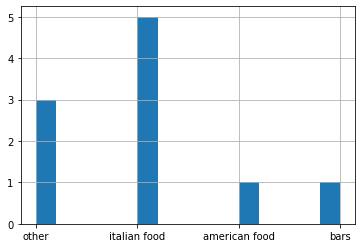

In [35]:
# Plot below avg restaurant categories
import matplotlib.pyplot as plt
gr = hoboken_venues.loc[hoboken_venues['label']==0]
gr['categories_new'].hist(bins=15)
plt.show()

In [36]:
hoboken_venues.loc[hoboken_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,Italian Restaurant,42.350966,-71.068695,243,great,italian food,1
15,Parish Cafe & Bar,3fd66200f964a52045ec1ee3,Sandwich Place,42.351746,-71.071525,185,great,other,1
51,Caffè Nero,53734d5e498ef0e9f93925f3,Coffee Shop,42.353521,-71.062348,360,great,other,1
53,Jaho Coffee Roaster & Wine Bar,55e0c3d7498ec10bc1501534,Coffee Shop,42.351720,-71.062820,344,great,other,1
56,Q Restaurant,4c91546ab641236ab6a68079,Hotpot Restaurant,42.351707,-71.062715,180,great,asian food,1
57,Grill 23 & Bar,3fd66200f964a520eaeb1ee3,Steakhouse,42.349507,-71.072159,241,great,american food,1
66,Pho Pasteur,4a91e4f7f964a520421c20e3,Noodle House,42.351513,-71.062811,281,great,asian food,1
67,Cheers,41478600f964a520bd1c1fe3,Bar,42.355877,-71.071271,513,great,bars,1
72,FiRE + iCE Boston,40b28c80f964a5200bf81ee3,American Restaurant,42.350578,-71.072644,257,great,american food,1
77,Dumpling Cafe,4c7c06403badb1f7ea9f5654,Chinese Restaurant,42.351260,-71.062994,223,great,asian food,1


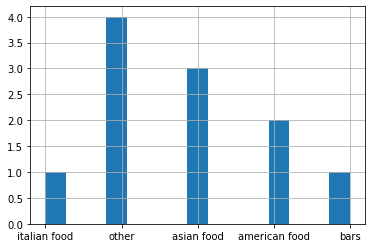

In [37]:
# Plot great restaurant categories
import matplotlib.pyplot as plt
gr = hoboken_venues.loc[hoboken_venues['label']==1]
gr['categories_new'].hist(bins=15)
plt.show()

In [38]:
hoboken_venues.loc[hoboken_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
14,Hermes,4ba42a98f964a520538838e3,Boutique,42.351849,-71.070525,22,poor,other,2
19,Shaking Crab,5a6d088e0a464d531abfaaa3,Seafood Restaurant,42.352291,-71.066204,8,poor,other,2
24,Bacco's Fine Foods,51ae7268498ece55c2dbb9e6,Gourmet Shop,42.350750,-71.071220,19,poor,other,2
52,Mooncusser Fish House,59867be32a7ab676698036b8,Seafood Restaurant,42.349889,-71.070633,8,poor,other,2
63,Chanel Boutique,4bb2c3fd715eef3b9db585bb,Boutique,42.352320,-71.071604,19,poor,other,2
73,by CHLOE.,5b60cae5b9ac38002cd42c3c,Vegetarian / Vegan Restaurant,42.351651,-71.072351,20,poor,asian food,2
75,Mei Sum Bakery,4ab90e73f964a520dd7d20e3,Bakery,42.351472,-71.062115,9,poor,other,2
83,Blu,4a9025aaf964a520391620e3,Restaurant,42.353267,-71.062918,25,poor,american food,2
88,Dunkin',5d0393c8c0cacb002c9daec9,Donut Shop,42.355184,-71.063144,1,poor,other,2
89,Hampshire House,4abae13bf964a5203e8320e3,American Restaurant,42.355758,-71.071283,13,poor,american food,2


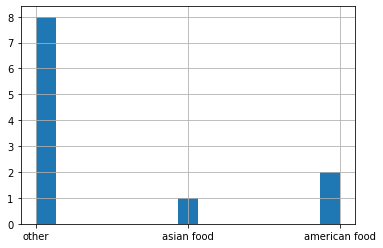

In [39]:
# Plot poor restaurant categories
import matplotlib.pyplot as plt
gr = hoboken_venues.loc[hoboken_venues['label']==2]
gr['categories_new'].hist(bins=15)
plt.show()

In [40]:
hoboken_venues.loc[hoboken_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
1,Bistro du Midi,4b3cc11af964a520da8625e3,French Restaurant,42.352249,-71.069634,154,avg avg,french food,3
2,Ostra,5293ef69498e009610e3fdf1,Seafood Restaurant,42.351060,-71.066976,130,avg avg,other,3
17,Tatte Bakery & Cafe,5a609e9c26659b64aa76af3c,Bakery,42.351667,-71.071715,137,avg avg,other,3
21,Teatro,4a4b7a0df964a52067ac1fe3,Italian Restaurant,42.353026,-71.064371,90,avg avg,italian food,3
30,Boloco,4b1ef391f964a520f82124e3,Burrito Place,42.352492,-71.067091,122,avg avg,mexican food,3
42,W Lounge,4b50fd60f964a520343c27e3,Hotel Bar,42.350990,-71.065293,67,avg avg,bars,3
43,Mike & Patty's,4a3cf8bcf964a520b6a11fe3,Sandwich Place,42.348604,-71.067913,127,avg avg,other,3
49,Genki Ya,519abb90498ecd79e9066cd9,Sushi Restaurant,42.351106,-71.064821,85,avg avg,asian food,3
78,Legal Crossing,531e28ea11d2cfce53f540f9,Seafood Restaurant,42.353593,-71.062271,112,avg avg,other,3
87,Sip Wine Bar & Kitchen,4fcfd6c2e4b014bc8f359648,Restaurant,42.353329,-71.062556,91,avg avg,american food,3


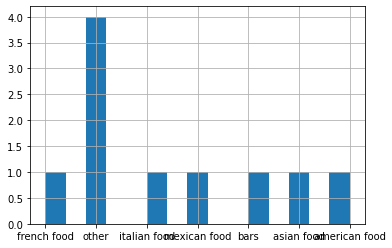

In [41]:
# Plot avg restaurant categories
import matplotlib.pyplot as plt
gr = hoboken_venues.loc[hoboken_venues['label']==3]
gr['categories_new'].hist(bins=15)
plt.show()

### Summary
#### Asian food and American food are highly recommended, and the overall number of "like" is higher. However, Vist Boston should recommend Italian food carefully because the number of "like" is mostly below average. Finally, other categories of restaurants are not recommended. The overall number of "like" is small, which may cause an unpleasant dining experience for tourists.